## Importing Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
from datetime import datetime as dt
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows' , 10000)
pd.set_option('display.width', 10000)
pd.set_option('display.precision', 6)
plt.rcParams['figure.figsize'] = [12, 6]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


##Load the data

In [ ]:
df = pd.read_csv("/content/physical activity monitoring_UCI (2).csv")
if 'Unnamed: 0' in df.columns.tolist():
    df = df.drop(['Unnamed: 0'], axis=1)
if 'timestamp' in df.columns.tolist():
    df = df.drop(['timestamp'], axis=1)

df.head()

,activity,IMUhand4,IMUhand5,IMUhand6,IMUhand7,IMUhand8,IMUhand9,IMUhand10,IMUhand11,IMUhand12,IMUhand13,IMUhand14,IMUhand15,IMUhand16,IMUhand17,IMUhand18,IMUhand19,IMUhand20,IMUchest21,IMUchest22,IMUchest23,IMUchest24,IMUchest25,IMUchest26,IMUchest27,IMUchest28,IMUchest29,IMUchest30,IMUchest31,IMUchest32,IMUchest33,IMUchest34,IMUchest35,IMUchest36,IMUchest37,IMUankle38,IMUankle39,IMUankle40,IMUankle41,IMUankle42,IMUankle43,IMUankle44,IMUankle45,IMUankle46,IMUankle47,IMUankle48,IMUankle49,IMUankle50,IMUankle51,IMUankle52,IMUankle53,IMUankle54
0,1,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.0,0.0,0.0,0.0,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,1.0,0.0,0.0,0.0,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0
1,1,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.0,0.0,0.0,0.0,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,1.0,0.0,0.0,0.0,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0
2,1,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.0,0.0,0.0,0.0,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,1.0,0.0,0.0,0.0,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0
3,1,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.0,0.0,0.0,0.0,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,1.0,0.0,0.0,0.0,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0
4,1,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.0,0.0,0.0,0.0,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,1.0,0.0,0.0,0.0,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71512 entries, 0 to 71511
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   activity    71512 non-null  int64  
 1   IMUhand4    71512 non-null  float64
 2   IMUhand5    71512 non-null  float64
 3   IMUhand6    71512 non-null  float64
 4   IMUhand7    71512 non-null  float64
 5   IMUhand8    71512 non-null  float64
 6   IMUhand9    71512 non-null  float64
 7   IMUhand10   71512 non-null  float64
 8   IMUhand11   71512 non-null  float64
 9   IMUhand12   71512 non-null  float64
 10  IMUhand13   71512 non-null  float64
 11  IMUhand14   71512 non-null  float64
 12  IMUhand15   71512 non-null  float64
 13  IMUhand16   71512 non-null  float64
 14  IMUhand17   71512 non-null  float64
 15  IMUhand18   71512 non-null  float64
 16  IMUhand19   71512 non-null  float64
 17  IMUhand20   71512 non-null  float64
 18  IMUchest21  71512 non-null  float64
 19  IMUchest22  71511 non-nul

In [ ]:
df.head(5)

,activity,IMUhand4,IMUhand5,IMUhand6,IMUhand7,IMUhand8,IMUhand9,IMUhand10,IMUhand11,IMUhand12,IMUhand13,IMUhand14,IMUhand15,IMUhand16,IMUhand17,IMUhand18,IMUhand19,IMUhand20,IMUchest21,IMUchest22,IMUchest23,IMUchest24,IMUchest25,IMUchest26,IMUchest27,IMUchest28,IMUchest29,IMUchest30,IMUchest31,IMUchest32,IMUchest33,IMUchest34,IMUchest35,IMUchest36,IMUchest37,IMUankle38,IMUankle39,IMUankle40,IMUankle41,IMUankle42,IMUankle43,IMUankle44,IMUankle45,IMUankle46,IMUankle47,IMUankle48,IMUankle49,IMUankle50,IMUankle51,IMUankle52,IMUankle53,IMUankle54
0,1,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.0,0.0,0.0,0.0,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,1.0,0.0,0.0,0.0,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0
1,1,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.0,0.0,0.0,0.0,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,1.0,0.0,0.0,0.0,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0
2,1,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.0,0.0,0.0,0.0,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,1.0,0.0,0.0,0.0,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0
3,1,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.0,0.0,0.0,0.0,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,1.0,0.0,0.0,0.0,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0
4,1,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.0,0.0,0.0,0.0,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,1.0,0.0,0.0,0.0,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0


In [ ]:
'''
3 types of activities
– 1 lying
– 2 sitting     
– 5 running
'''
df['activity'].value_counts()

1    27363
2    23465
5    20684
Name: activity, dtype: int64

In [ ]:
#  use 3 for running
conditions = [df['activity']==1,df['activity']==2,df['activity']==5]
choices = [1,2,3]
df['activity']  = np.select(conditions, choices, default='null')
df['activity'].value_counts()


1    27363
2    23465
3    20684
Name: activity, dtype: int64

In [ ]:
df.head(10)

,activity,IMUhand4,IMUhand5,IMUhand6,IMUhand7,IMUhand8,IMUhand9,IMUhand10,IMUhand11,IMUhand12,IMUhand13,IMUhand14,IMUhand15,IMUhand16,IMUhand17,IMUhand18,IMUhand19,IMUhand20,IMUchest21,IMUchest22,IMUchest23,IMUchest24,IMUchest25,IMUchest26,IMUchest27,IMUchest28,IMUchest29,IMUchest30,IMUchest31,IMUchest32,IMUchest33,IMUchest34,IMUchest35,IMUchest36,IMUchest37,IMUankle38,IMUankle39,IMUankle40,IMUankle41,IMUankle42,IMUankle43,IMUankle44,IMUankle45,IMUankle46,IMUankle47,IMUankle48,IMUankle49,IMUankle50,IMUankle51,IMUankle52,IMUankle53,IMUankle54
0,1,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.0,0.0,0.0,0.0,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,1.0,0.0,0.0,0.0,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0
1,1,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.0,0.0,0.0,0.0,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,1.0,0.0,0.0,0.0,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0
2,1,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.0,0.0,0.0,0.0,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,1.0,0.0,0.0,0.0,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0
3,1,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.0,0.0,0.0,0.0,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,1.0,0.0,0.0,0.0,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0
4,1,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.0,0.0,0.0,0.0,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,1.0,0.0,0.0,0.0,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0
5,1,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,0.063895,0.007175,0.024701,8.60505,-66.7184,-19.8429,1.0,0.0,0.0,0.0,32.1875,0.271221,9.64826,-1.84275,0.188981,9.72523,-1.50392,-0.002481,-0.018131,-0.045486,1.010820,-50.4054,44.1573,1.0,0.0,0.0,0.0,30.75,9.65780,-1.92147,-0.098161,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1.0,0.0,0.0,0.0
6,1,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,0.190837,0.003116,0.038762,9.16003,-66.8578,-19.9665,1.0,0.0,0.0,0.0,32.1875,0.274553,9.61139,-1.72641,0.158971,9.67993,-1.44342,0.024609,-0.022451,-0.033739,1.261700,-50.9669,43.5475,1.0,0.0,0.0,0.0,30.75,9.65839,-1.80756,-0.098862,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1.0,0.0,0.0,0.0
7,1,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,0.200328,-0.009266,0.068567,9.47898,-67.3025,-20.6693,1.0,0.0,0.0,0.0,32.1875,0.238925,9.68733,-1.64986,0.173916,9.66480,-1.44355,0.012477,-0.000388,-0.031705,0.355493,-51.1679,44.3915,1.0,0.0,0.0,0.0,30.75,9.65690,-1.88318,-0.136998,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1.0,0.0,0.0,0.0
8,1,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,0.204098,-0.068256,0.050000,9.15218,-67.0705,-20.3159,1.0,0.0,0.0,0.0,32.1875,0.349738,9.64854,-1.76389,0.188777,9.66481,-1.47387,0.017892,-0.018287,-0.037089,0.125653,-50.9288,43.5303,1.0,0.0,0.0,0.0,30.75,9.77727,-1.81020,0.133911,9.61686,-1.72212,0.326234,0.039346,0.

In [ ]:
df.tail(10)

,activity,IMUhand4,IMUhand5,IMUhand6,IMUhand7,IMUhand8,IMUhand9,IMUhand10,IMUhand11,IMUhand12,IMUhand13,IMUhand14,IMUhand15,IMUhand16,IMUhand17,IMUhand18,IMUhand19,IMUhand20,IMUchest21,IMUchest22,IMUchest23,IMUchest24,IMUchest25,IMUchest26,IMUchest27,IMUchest28,IMUchest29,IMUchest30,IMUchest31,IMUchest32,IMUchest33,IMUchest34,IMUchest35,IMUchest36,IMUchest37,IMUankle38,IMUankle39,IMUankle40,IMUankle41,IMUankle42,IMUankle43,IMUankle44,IMUankle45,IMUankle46,IMUankle47,IMUankle48,IMUankle49,IMUankle50,IMUankle51,IMUankle52,IMUankle53,IMUankle54
71502,1,33.4375,-6.84561,6.35266,2.84116,-6.73229,6.44127,2.90099,-0.017804,0.010144,0.032921,17.9814,-41.8021,-19.5660,0.181146,0.329256,-0.495133,-0.783339,36.5625,0.765340,9.41187,-3.14955,0.478921,9.27365,-2.85200,-0.027762,0.001485,0.024125,-18.5520,-33.2328,9.56188,0.021689,-0.008526,0.806598,0.590641,34.3125,9.67931,-1.37400,-2.06941,9.66947,-1.24035,-1.50696,-0.003855,-0.024429,-0.016353,-46.5701,0.767746,61.6069,0.011224,0.758975,-0.085216,0.645421
71503,1,33.4375,-6.88072,6.35362,2.91761,-6.74761,6.44135,2.87081,-0.020087,0.003077,-0.009117,17.8713,-41.4694,-19.5612,0.181145,0.329285,-0.495155,-0.783313,36.5625,0.757035,9.29709,-3.42037,0.478381,9.27377,-2.94267,-0.011136,0.033539,-0.012349,-18.4724,-32.3449,9.93202,0.021682,-0.008391,0.806720,0.590476,34.3125,9.60485,-1.29759,-2.07064,9.68435,-1.30089,-1.53711,0.055626,-0.005860,0.017063,-46.4549,0.543072,61.6036,0.011369,0.758957,-0.085147,0.645449
71504,1,33.4375,-6.80702,6.46619,2.84136,-6.76256,6.44147,2.88592,-0.044013,0.012294,-0.023337,18.3131,-40.9464,-19.9078,0.181130,0.329421,-0.494683,-0.783558,36.5625,0.691000,9.26201,-3.07296,0.524129,9.25841,-2.82209,-0.027148,0.046032,-0.022017,-18.1140,-32.9190,10.30440,0.021667,-0.008259,0.806884,0.590255,34.3125,9.56762,-1.25938,-2.07126,9.66940,-1.28575,-1.52195,-0.014181,-0.053397,-0.023741,-46.9131,1.113990,61.3659,0.011280,0.759121,-0.085108,0.645263
71505,1,33.4375,-6.89008,6.35127,2.64806,-6.74787,6.42624,2.85574,-0.052213,0.010568,0.009924,17.8627,-41.3541,-20.0228,0.180928,0.329506,-0.494348,-0.783780,36.5625,0.767528,9.37473,-3.07194,0.599803,9.30348,-2.79220,-0.002138,0.019146,-0.026989,-18.1036,-33.2568,10.54930,0.021518,-0.008017,0.807180,0.589858,34.3125,9.72573,-1.33884,-1.76043,9.66941,-1.24037,-1.52209,-0.024222,0.002549,0.005116,-46.8065,1.011290,60.4975,0.011171,0.759092,-0.085195,0.645287
71506,1,33.4375,-6.77003,6.35208,2.84230,-6.68733,6.41074,2.90101,-0.024987,-0.011077,-0.003788,17.6525,-41.0230,-19.4381,0.180945,0.329452,-0.494359,-0.783792,36.5625,0.653284,9.41274,-3.07414,0.539734,9.31871,-2.79179,-0.016770,0.006227,-0.002048,-18.1036,-33.2568,10.54930,0.021386,-0.007666,0.807403,0.589563,34.3125,9.64448,-1.29847,-1.99305,9.65419,-1.27068,-1.56732,0.028049,-0.011845,-0.024028,-46.4528,0.323998,61.4775,0.011025,0.759115,-0.085062,0.645281
71507,1,33.4375,-6.84267,6.39127,2.91805,-6.74774,6.41116,2.88597,-0.001022,0.047203,0.001748,17.8821,-40.6040,-19.2048,0.180825,0.329614,-0.494518,-0.783651,36.5625,0.803454,9.41175,-3.14886,0.584972,9.37904,-2.83722,-0.005219,0.015908,0.005633,-17.7520,-33.3702,9.45125,0.021647,-0.007763,0.807096,0.589973,34.3125,9.60685,-1.33620,-1.99321,9.65419,-1.25556,-1.56737,0.029241,-0.029541,-0.004497,-46.3495,0.873544,61.3587,0.011108,0.759196,-0.084954,0.645198
71508,1,33.4375,-6.81210,6.31342,2.72633,-6.73292,6.39594,2.87089,-0.012497,0.017236,0.014001,18.0967,-41.4839,-19.4482,0.180727,0.329629,-0.494728,-0.783535,36.5625,0.839281,9.41111,-3.22565,0.554985,9.39420,-2.83700,-0.019903,0.013898,-0.014653,-17.6660,-32.7083,10.06630,0.021605,-0.007616,0.807173,0.589870,34.3125,9.60646,-1.41214,-1.99274,9.66921,-1.27068,-1.56740,0.044245,0.011559,0.012470,-46.3524,0.662762,60.6138,0.011200,0.759131,-0.084887,0.645282
71509,1,33.4375,-6.72823,6.35279,2.95838,-6.73305,6.39592,2.85579,0.034529,0.040471,-0.022237,17.4372,-40.7974,-19.0861,0.180811,0.329769,-0.495082,-0.783233,36.5625,0.692442,9.37523,-3.03459,0.569750,9.37912,-2.86

In [ ]:
df.isnull().values.any()
df.isnull().sum().sum()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.isnull().sum().sum()

33

In [ ]:
df2 = df.dropna()

##Pie Chart

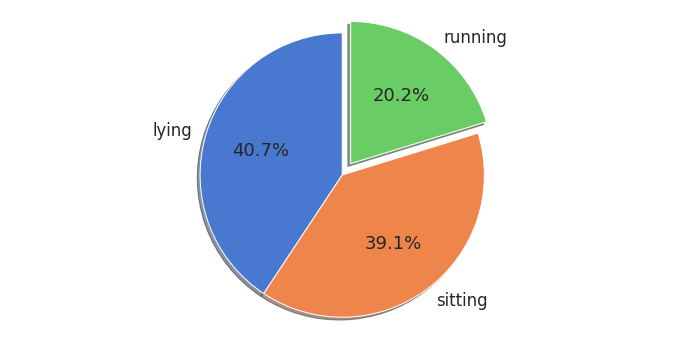

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'lying', 'sitting', 'running'
sizes = [192290, 184645, 95641]
# only "explode" the 3nd slice (i.e. 'running')
explode = (0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##Standardization

In [ ]:
# standardization
data_std = df2.copy().drop(['activity'], axis=1)
Class = df2['activity'].copy()
featuresToScale = data_std.columns
scaler = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
data_std.loc[:, featuresToScale] = scaler.fit_transform(data_std[featuresToScale])
data_std.describe()



,IMUhand4,IMUhand5,IMUhand6,IMUhand7,IMUhand8,IMUhand9,IMUhand10,IMUhand11,IMUhand12,IMUhand13,IMUhand14,IMUhand15,IMUhand16,IMUhand17,IMUhand18,IMUhand19,IMUhand20,IMUchest21,IMUchest22,IMUchest23,IMUchest24,IMUchest25,IMUchest26,IMUchest27,IMUchest28,IMUchest29,IMUchest30,IMUchest31,IMUchest32,IMUchest33,IMUchest34,IMUchest35,IMUchest36,IMUchest37,IMUankle38,IMUankle39,IMUankle40,IMUankle41,IMUankle42,IMUankle43,IMUankle44,IMUankle45,IMUankle46,IMUankle47,IMUankle48,IMUankle49,IMUankle50,IMUankle51,IMUankle52,IMUankle53,IMUankle54
count,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,71511.000000,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,71511.000000,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,71511.000000,7.151100e+04,7.151100e+04,71511.000000,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04,7.151100e+04
mean,-1.704245e-15,5.087300e-17,6.995037e-17,-9.538687e-17,0.000000,5.723212e-17,1.526190e-16,1.271825e-17,1.430803e-17,6.756570e-18,0.000000,-3.815475e-17,1.589781e-16,1.011101e-15,1.271825e-17,2.543650e-17,1.271825e-17,5.882190e-15,5.405256e-17,-1.589781e-16,-5.087300e-17,-6.359124e-17,2.543650e-16,-1.271825e-17,1.112847e-17,-1.271825e-17,1.589781e-18,1.526190e-16,1.144642e-16,-2.543650e-17,-3.058739e-15,-2.543650e-17,1.271825e-17,-6.359124e-18,-3.739165e-15,0.000000,3.815475e-17,1.208234e-16,0.000000,1.271825e-17,1.271825e-17,-5.564234e-18,-9.538687e-18,-1.256921e-17,2.066715e-16,-1.144642e-16,1.112847e-17,1.030178e-15,-1.271825e-17,-2.543650e-17,6.359124e-18
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007,1.000007e+00,1.000007e+00,1.000007,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.653931e+00,-6.117407e+00,-1.912369e+00,-4.318935e+00,-6.019851,-1.941634e+00,-4.252552e+00,-7.082923e+00,-4.150901e+00,-5.160859e+00,-2.383320,-3.257758e+00,-5.018359e+00,-1.990595e+01,-5.065101e-02,-1.985300e+01,-1.976921e+01,-2.664572e+00,-5.558878e+00,-3.037420e+00,-4.716028e+00,-4.647662e+00,-3.687040e+00,-4.290468e+00,-4.744178e+00,-5.889490e+00,-6.184252e+00,-2.630138e+00,-2.655166e+00,-1.271142e+00,-1.981251e+01,-2.624296e+01,-5.065179e-02,-5.065158e-02,-2.455360e+00,-5.982699,-8.450456e+00,-1.261599e+01,-6.290136,-6.531765e+00,-1.015321e+01,-7.161516e+00,-5.287310e+00,-5.327196e+00,-4.257576e+00,-3.953230e+00,-3.635937e+00,-1.981611e+01,-5.065187e-02,-2.009556e+01,-5.065187e-02
25%,-8.812427e-01,-6.155107e-01,-5.628332e-01,-6.831071e-01,-0.614490,-5.598057e-01,-6.879747e-01,-1.974039e-01,-8.101275e-02,-1.027802e-02,-0.975744,-8.994708e-01,-9.251180e-01,5.065168e-02,-5.065101e-02,5.065171e-02,5.065185e-02,-5.946600e-01,-2.586145e-01,-7.401962e-01,-5.612103e-01,-2.546784e-01,-7.357584e-01,-5.611951e-01,-9.764755e-02,-7.458291e-02,-7.118637e-02,-5.235066e-01,-8.557401e-01,-7.128232e-01,5.065179e-02,4.886039e-02,-5.065179e-02,-5.065158e-02,-7.535376e-01,-0.725864,-7.482779e-01,-4.563201e-01,-0.795697,-7.951268e-01,-5.012087e-01,-3.103659e-02,-6.887704e-02,-9.227845e-03,-1.130506e+00,-6.948639e-01,-4.722327e-01,5.065182e-02,-5.065187e-02,5.064928e-02,-5.065187e-02
50%,-2.270045e-02,2.140896e-01,-9.382798e-02,3.291668e-01,0.219230,-9.375

##Hot Encoding

###One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy. One-hot encoding is a common method for dealing with categorical data in machine learning.

In [ ]:
# One-hot encoding
from sklearn.preprocessing import label_binarize
'''
3 activities
– 1 lying
– 2 sitting     
– 3 running
'''
# one-hot encoding
n_classes = 3
lb = pp.LabelBinarizer()
y_label = lb.fit_transform(Class)

In [ ]:
np.unique(Class)

array(['1', '2', '3'], dtype=object)

In [ ]:
y_label

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
np.unique(y_label)

array([0, 1])

##KMean Clustering

In [ ]:
X_train , X_test , y_train , y_test = \
            train_test_split(data_std, y_label, test_size=0.2, random_state=42, stratify=y_label)

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0 's and 75% of 1 's

n_init is the number of initializations KMeans will be run with different numbers of clusters. The final results will be the best output of n_init consecutive runs in terms of inertia (within-cluster variation).

max_iter is the maximum number of iterations of the algorithm for a single run. The total iterations would be ( 225 iterations/per run) * 12 runs in our case.

n_jobs = -1 means we are using all processors. KMeans is really SLOW 

The Silhouette Coefficient is a measure of how well samples are clustered with samples that are similar to themselves. Clustering models with a high Silhouette Coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.

In [ ]:
X_train.head()

,IMUhand4,IMUhand5,IMUhand6,IMUhand7,IMUhand8,IMUhand9,IMUhand10,IMUhand11,IMUhand12,IMUhand13,IMUhand14,IMUhand15,IMUhand16,IMUhand17,IMUhand18,IMUhand19,IMUhand20,IMUchest21,IMUchest22,IMUchest23,IMUchest24,IMUchest25,IMUchest26,IMUchest27,IMUchest28,IMUchest29,IMUchest30,IMUchest31,IMUchest32,IMUchest33,IMUchest34,IMUchest35,IMUchest36,IMUchest37,IMUankle38,IMUankle39,IMUankle40,IMUankle41,IMUankle42,IMUankle43,IMUankle44,IMUankle45,IMUankle46,IMUankle47,IMUankle48,IMUankle49,IMUankle50,IMUankle51,IMUankle52,IMUankle53,IMUankle54
69284,-1.482222,1.119244,-0.403157,-0.673833,1.033427,-0.300088,-0.657283,0.375439,-1.427735,-0.278550,1.706204,-0.124172,0.153266,0.050652,-0.050651,0.050652,0.050652,0.095311,0.216415,-0.464163,-0.617595,0.124106,-0.168096,-0.672894,-1.462164,-1.944065,2.594783,0.152729,-0.372540,1.345736,0.050652,0.04886,-0.050652,-0.050652,0.769145,0.618023,0.085261,0.077165,0.392165,-0.045883,0.087380,1.615043,-1.693522,3.851391,0.023809,-1.494077,-0.661581,0.050652,-0.050652,0.050649,-0.050652
25143,0.578279,1.041048,-0.558950,0.739779,1.010338,-0.561342,0.833150,-0.152460,-0.069704,0.010862,-0.029670,1.088559,-0.939466,0.050652,-0.050651,0.050652,0.050652,-0.019684,-0.172969,-1.022614,1.413014,-0.186953,-1.026291,1.413754,-0.007121,-0.068115,-0.042105,1.365119,1.377013,-0.732463,0.050652,0.04886,-0.050652,-0.050652,-0.216120,-0.652679,-0.719101,-0.497386,-0.730134,-0.762456,-0.543850,0.050015,0.019358,0.004114,0.850908,0.845672,-0.252639,0.050652,-0.050652,0.050649,-0.050652
8960,-0.451972,0.151467,-0.077498,1.113715,0.135369,-0.087223,1.129635,-0.224485,-0.052643,0.005543,-0.975734,0.902182,-0.350263,0.050652,-0.050651,0.050652,0.050652,-1.399626,-0.042338,-0.705521,1.406234,-0.045638,-0.717243,1.393391,-0.138634,-0.052059,0.069013,1.082701,1.339266,-0.946743,0.050652,0.04886,-0.050652,-0.050652,-1.380525,-0.726951,-0.789660,-0.325565,-0.797598,-0.822632,-0.418863,0.075550,-0.028504,-0.001042,1.004812,0.904891,-0.463684,0.050652,-0.050652,0.050649,-0.050652
22182,0.320716,1.016990,-0.579397,0.784907,1.017989,-0.566279,0.811937,-0.204363,-0.035223,0.001071,-0.062653,1.069477,-0.965066,0.050652,-0.050651,0.050652,0.050652,-0.249675,-0.171566,-1.005188,1.433079,-0.198251,-1.033221,1.429505,-0.051386,-0.033102,0.042241,1.373275,1.400101,-0.722594,0.050652,0.04886,-0.050652,-0.050652,-0.484829,-0.660429,-0.731563,-0.472753,-0.731846,-0.779645,-0.508323,0.041279,-0.018409,0.006538,0.838694,0.881551,-0.300665,0.050652,-0.050652,0.050649,-0.050652
13737,-0.108555,0.579970,-1.148026,-2.654317,0.584940,-1.136431,-2.661577,-0.194270,-0.052193,0.007728,0.695746,1.857756,2.221354,0.050652,-0.050651,0.050652,0.050652,-0.939645,2.933015,-0.426553,-0.481075,2.948024,-0.420042,-0.503114,-0.115322,-0.042407,0.037342,-2.255130,0.871917,-0.628396,0.050652,0.04886,-0.050652,-0.050652,-1.022246,-0.799694,0.268407,-1.021557,-0.873575,0.285287,-1.119128,-0.018339,-0.032696,-0.008363,0.741414,0.233982,1.015856,0.050652,-0.050652,0.050649,-0.050652


In [ ]:
X_train.isnull().values.any()

False

In [ ]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
n_init = 12
max_iter = 225
tol = 0.0001
random_state = 42
n_jobs = -1
n_clusters = 3

t0 = dt.now()
print("=========  Start training ... ")

# Initialize the clusterer with n_clusters value and a random generator
# seed of 42 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
cluster_labels = clusterer.fit_predict(X_train)

# inertia
inertia = clusterer.inertia_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X_train, cluster_labels)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_train , cluster_labels)

print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia,
      ", the average silhouette_score is :", silhouette_avg)

t1 = dt.now()-t0
print("=========  Finished in ",t1)

=========  Start training ... 
For n_clusters = 3 , the inertia is : 1743600.3699988588 , the average silhouette_score is : 0.26292010416586414
=========  Finished in  0:01:24.787976


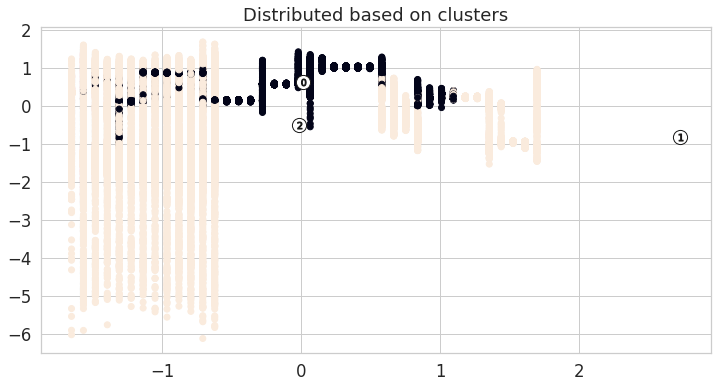

In [ ]:
# plot the distribution of the 3 clusters 
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=cluster_labels, label=cluster_labels)
# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')
plt.title("Distributed based on clusters");

In [ ]:
def overallAccuracy(clusterDF, labelsDF):
    countByCluster = pd.DataFrame(data=clusterDF['cluster'].value_counts())
    countByCluster.reset_index(inplace=True, drop=False)
    countByCluster.columns = ['cluster', 'clusterCount']
    # print('countByCluster \n', countByCluster)
    
    preds = pd.concat([labelsDF, clusterDF], axis=1)
    preds.columns = ['trueLabel', 'cluster']
    # print('preds \n', preds)
    
    countByLabel = pd.DataFrame(data=preds.groupby('trueLabel').count())
    print('countByLabel \n', countByLabel)
    
    '''
    lambda x: x.value_counts().iloc[0])
    will return the most freq true label for each cluster
    i.e. for cluster 0, the true label would be 1
         for cluster 1, the true label would be 2
         
         
            cluster           trueLabel
        0        1            20739
                 3            18   
                 2            10   
        1        2            19923
                 3            2857 
                 1            350  
        2        3            8732 
                 2            2219 
                 1            1860 
    
    '''
    countMostFreqLabel = pd.DataFrame(data=preds.groupby('cluster').agg( \
                                                {lambda x: x.value_counts().tolist()[0], \
                                                 lambda x: x.value_counts().keys().tolist()[0]}))
    countMostFreqLabel.reset_index(inplace=True, drop=False)
    countMostFreqLabel.columns = ['cluster', 'countMostFreqLabel','lable']
    print('countMostFreqLabel \n', countMostFreqLabel,'\n \n \n')
    
    
    accuracyDF = countMostFreqLabel.merge(countByCluster, left_on="cluster", right_on="cluster")
    print('accuracyDF: i.e. dots clustered as A, how many of them have real label A \n', accuracyDF)
    
    
    overallAccuracy = accuracyDF.countMostFreqLabel.sum().astype('float') / accuracyDF.clusterCount.sum().astype('float')
    print('overallAccuracy \n', overallAccuracy)
    
    
    accuracyByLabel = accuracyDF.countMostFreqLabel / accuracyDF.clusterCount
    print('accuracyByLabel \n', accuracyByLabel, '\n===================================\n \n \n')
    
    
    return countByCluster, countByLabel, countMostFreqLabel, accuracyDF, overallAccuracy, accuracyByLabel

In [ ]:
y_train.shape
y_train

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [ ]:
from matplotlib import cm

=========  Start training ... 
countByLabel 
            cluster
trueLabel         
1.0        21889  
2.0        18772  
3.0        16547  
countMostFreqLabel 
    cluster  countMostFreqLabel  lable
0  0        1.0                 21746
1  1        1.0                 143   
 
 

accuracyDF: i.e. dots clustered as A, how many of them have real label A 
    cluster  countMostFreqLabel  lable  clusterCount
0  0        1.0                 21746  57065       
1  1        1.0                 143    143         
overallAccuracy 
 3.496014543420501e-05
accuracyByLabel 
 0    0.000018
1    0.006993
dtype: float64 
 
 

countByLabel 
            cluster
trueLabel         
1.0        21889  
2.0        18772  
3.0        16547  
countMostFreqLabel 
    cluster  countMostFreqLabel  lable
0  0        1.0                 20312
1  1        1.0                 143  
2  2        3.0                 16475 
 
 

accuracyDF: i.e. dots clustered as A, how many of them have real label A 
    cluster  coun

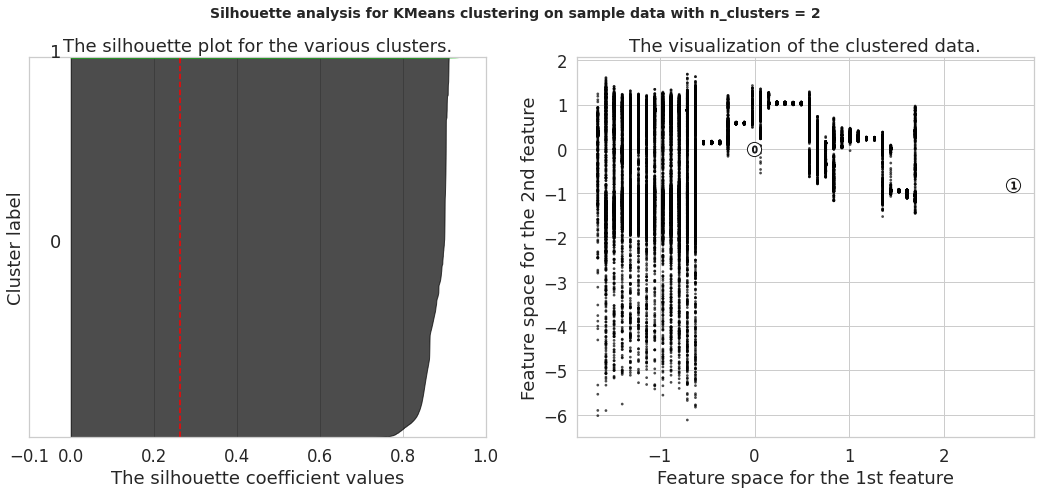

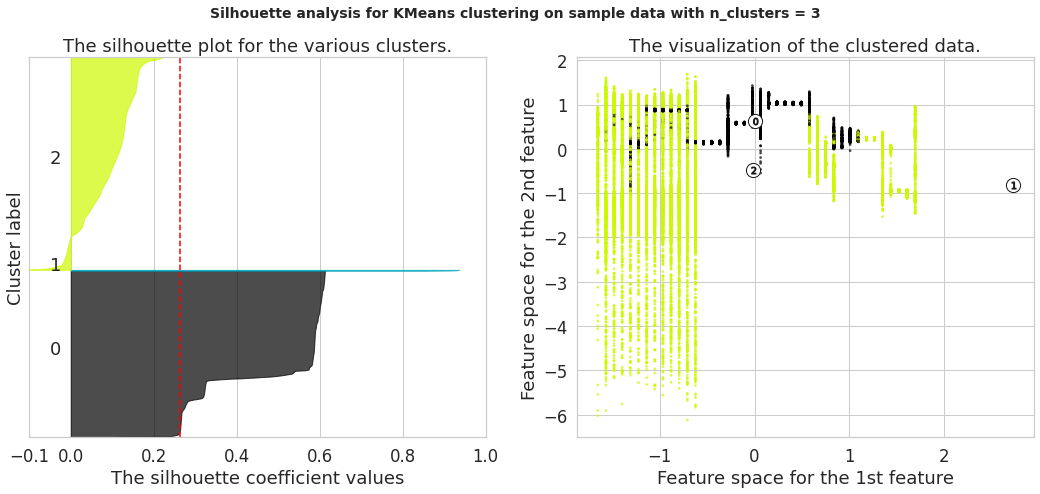

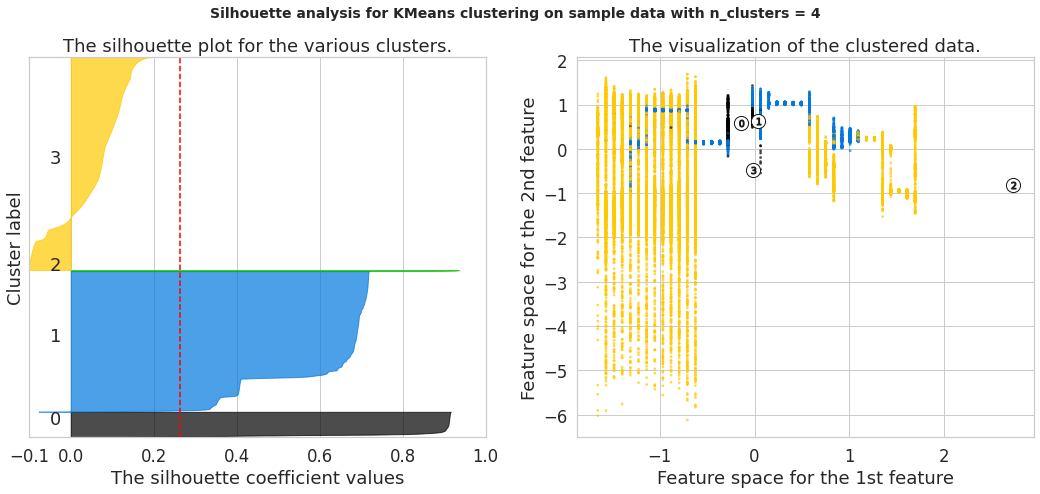

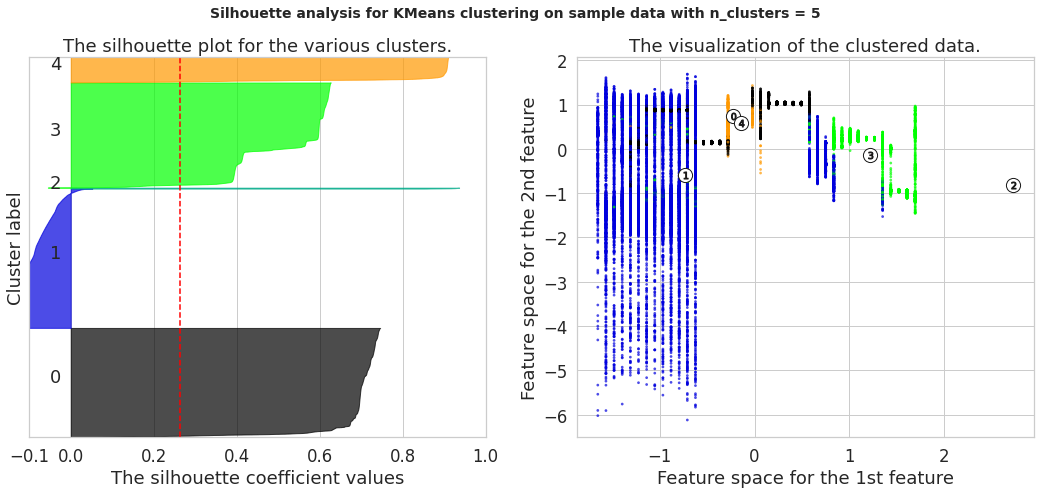

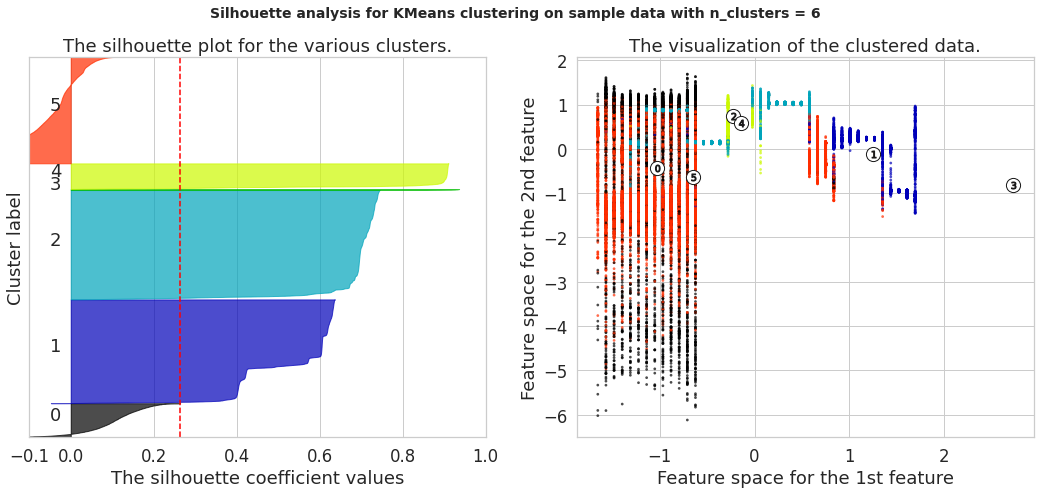

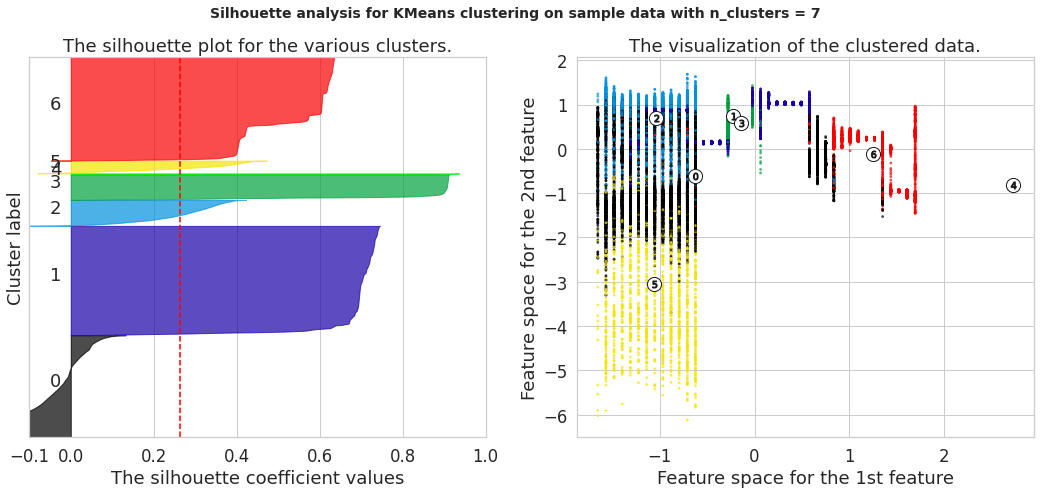

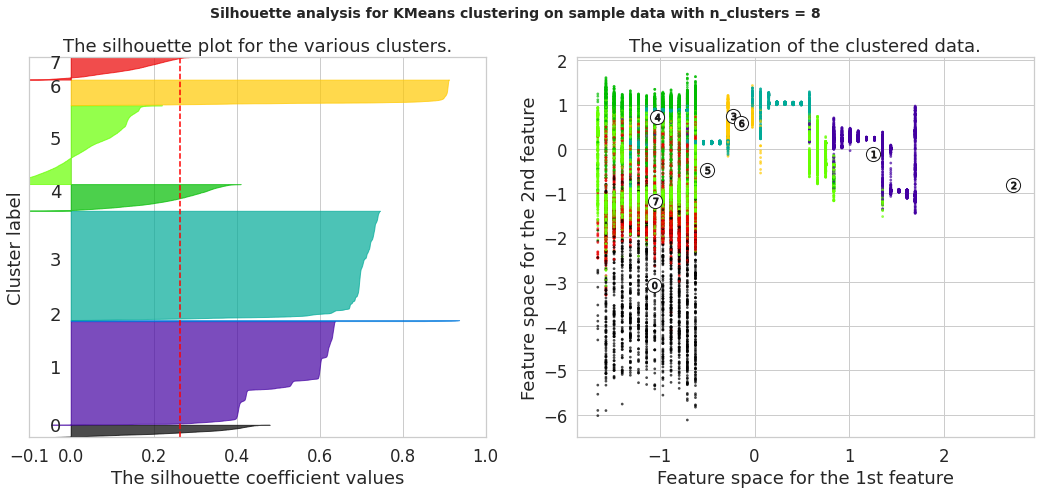

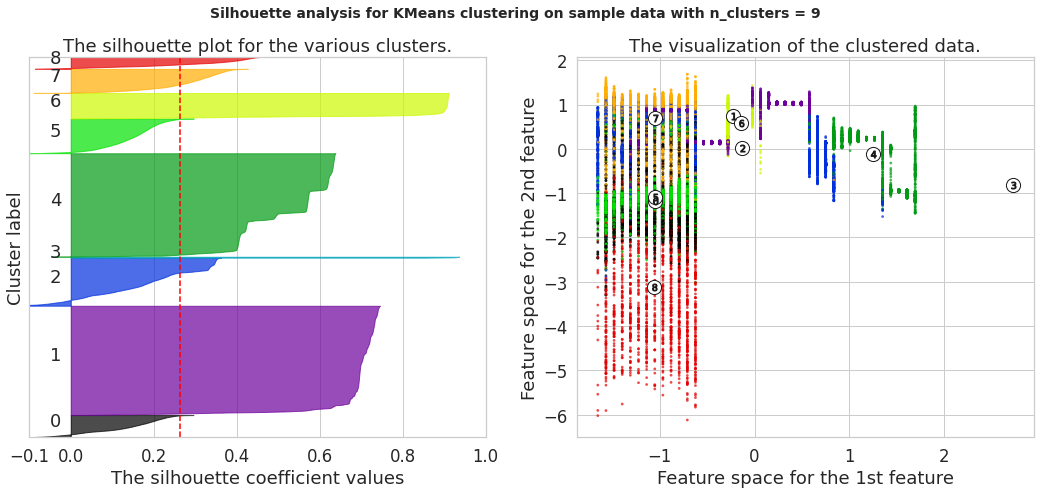

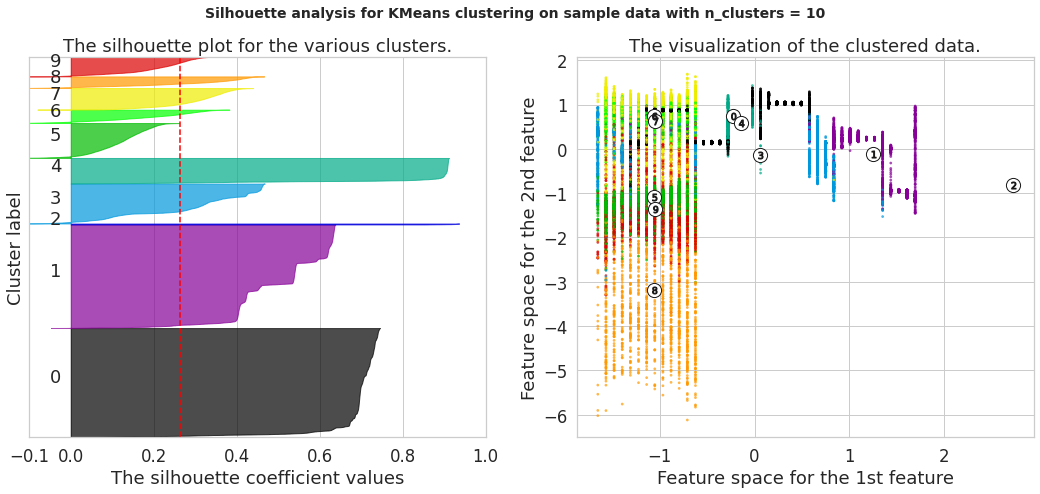

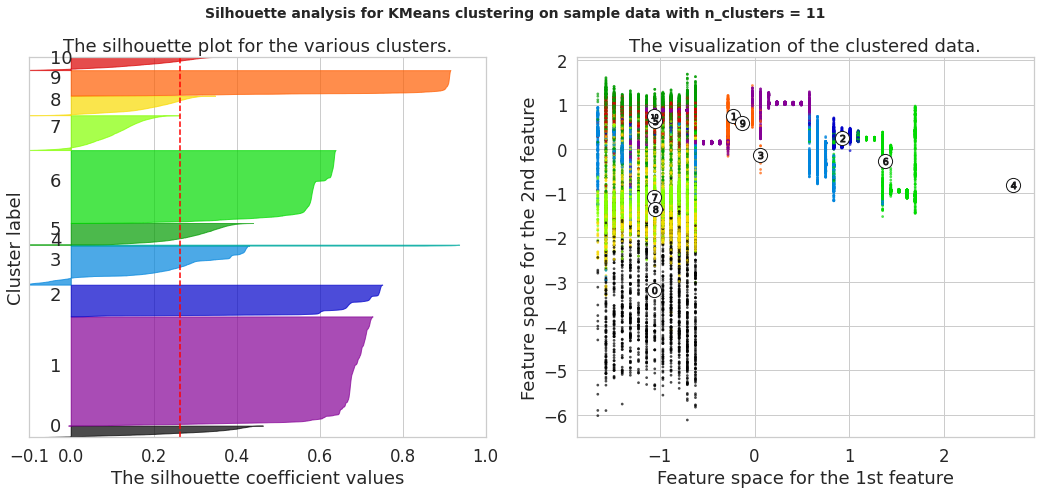

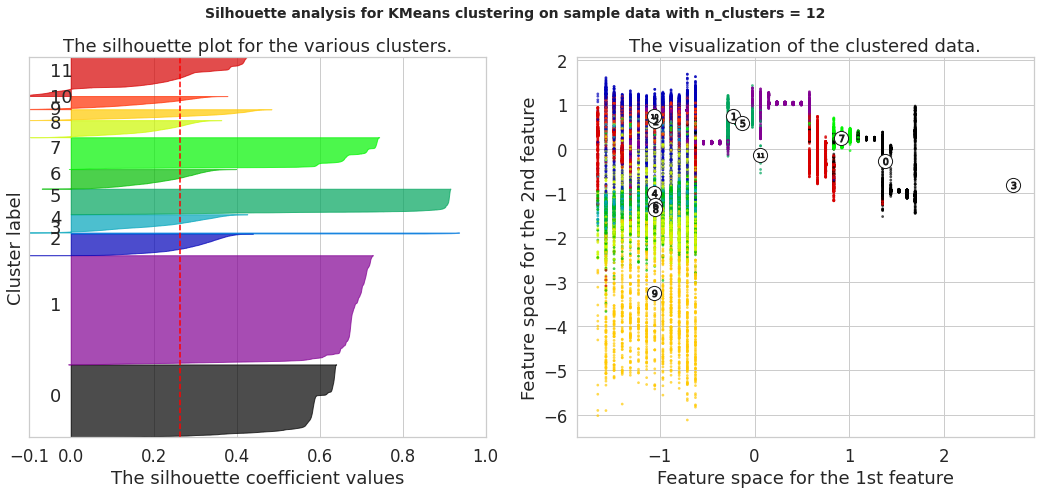

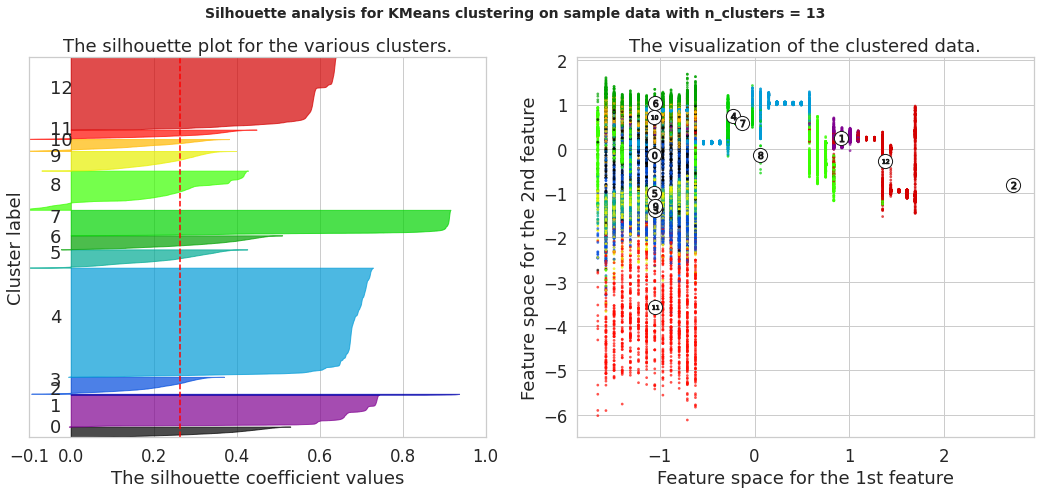

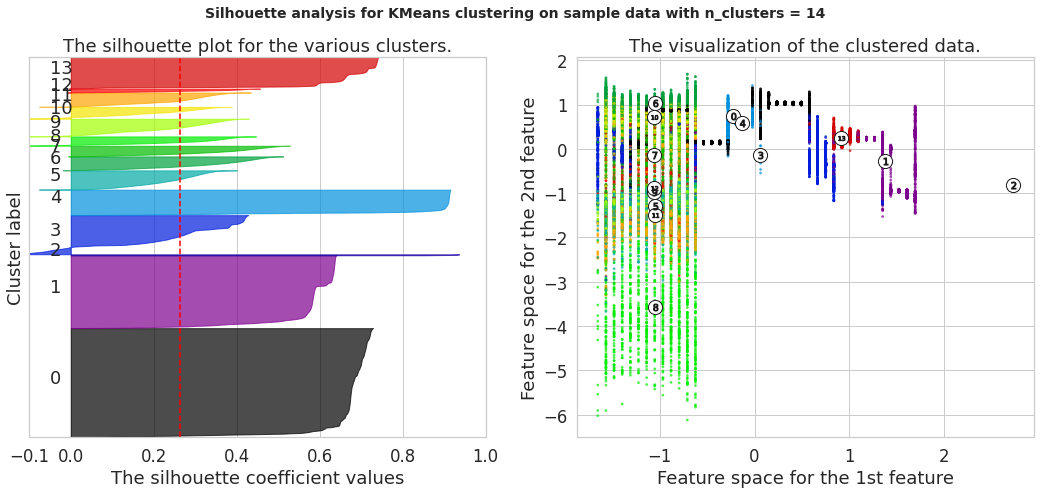

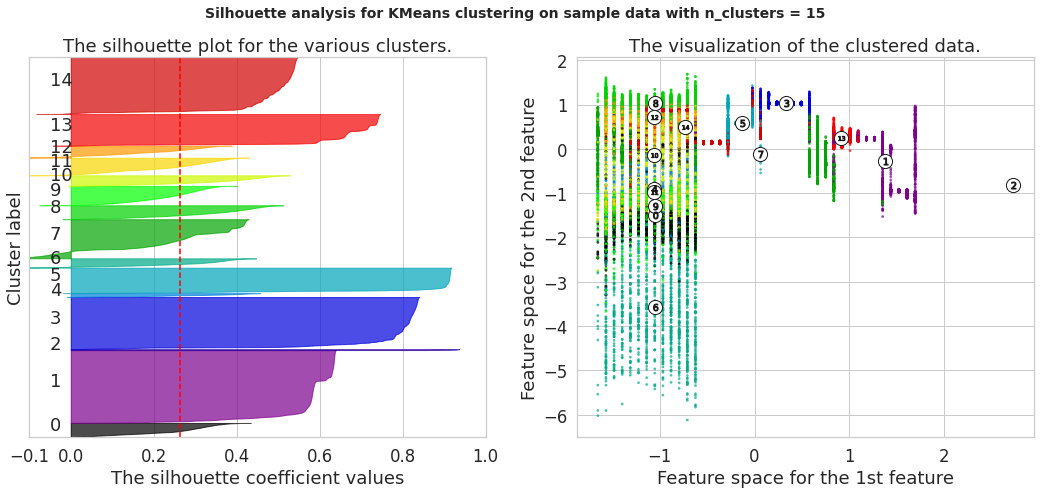

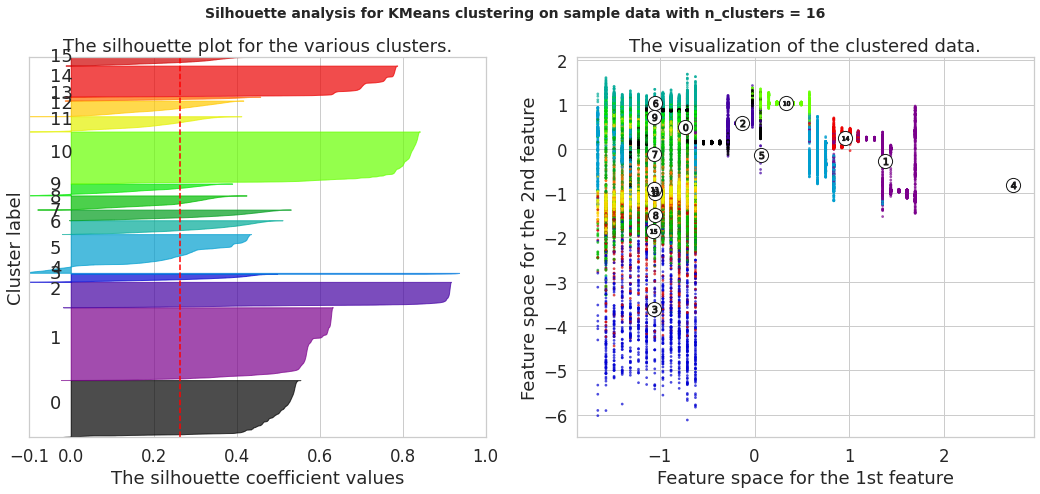

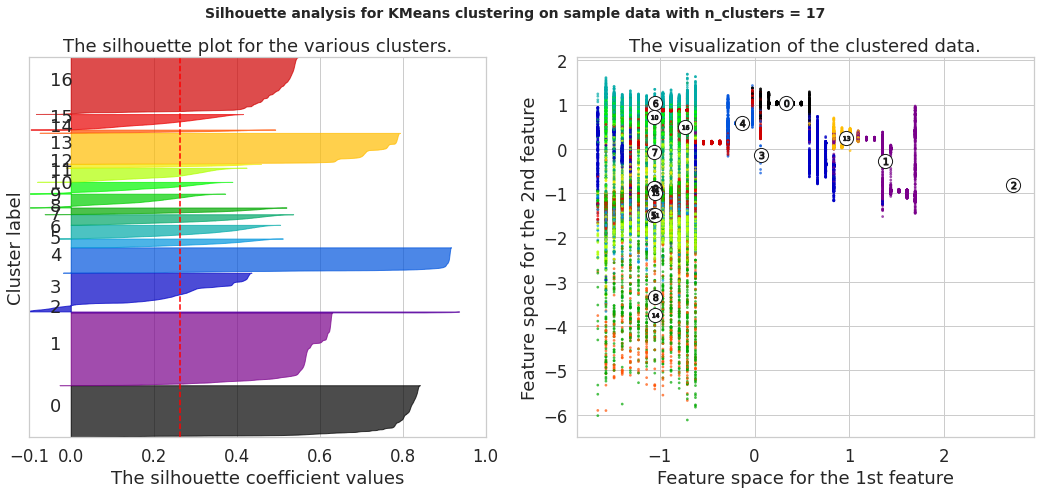

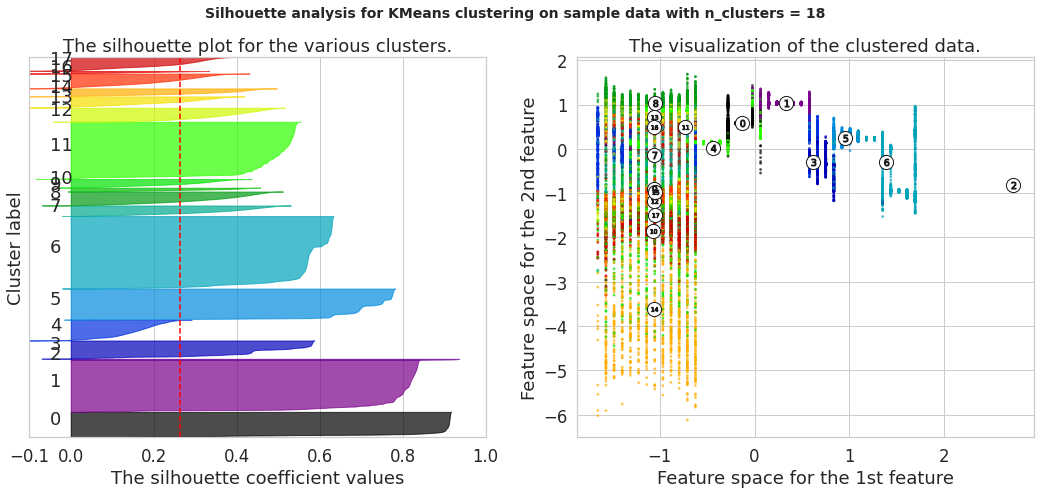

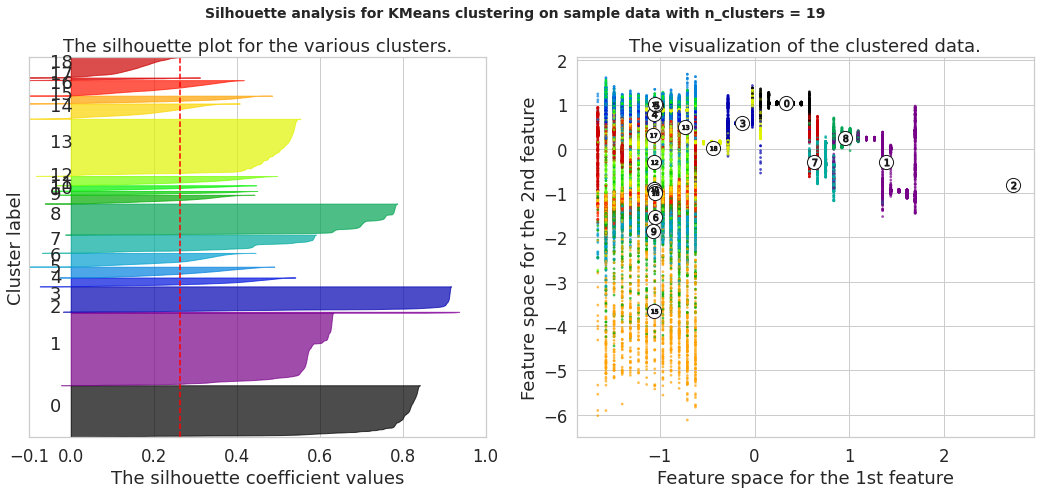

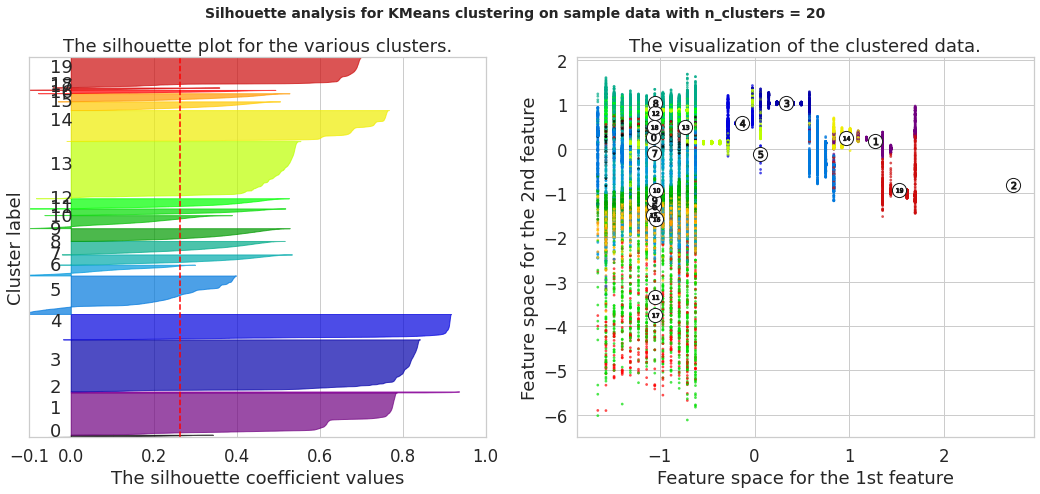

In [ ]:
# set up the parameters
n_init = 12
max_iter = 225
tol = 0.0001
random_state = 42
n_jobs = -1

t0 = dt.now()
print("=========  Start training ... ")

inertia_df = pd.DataFrame(data=[], index=range(2, 21), columns=['inertia'])
silhouette_avg_df = pd.DataFrame(data=[], index=range(2, 21), columns=['silhouetteAvg'])
overallAccuracy_df = pd.DataFrame(data=[], index=range(2, 21), columns=['overallAccuracy'])
                                                             
for n_clusters in range(2, 21):
    clusterer = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol = tol, \
                    random_state=random_state)
    cluster_labels = clusterer.fit_predict(X_train)
    
    # inertia
    inertia_df.loc[n_clusters] = clusterer.inertia_  

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg_df.loc[n_clusters] = silhouette_score(X_train, cluster_labels)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    # self-defined accuracy function: overallAccuracy
    kmeansClustered = pd.DataFrame(data=cluster_labels, index=X_train.index, columns=['cluster'])
    countByCluster_kMeans, countByLabel_kMeans, \
    countMostFreq_kMeans, \
    accuracyDF_kMeans, overallAccuracy_kMeans, \
    accuracyByLabel_kMeans = overallAccuracy(kmeansClustered, pd.Series(Class.astype('float'), index=X_train.index.values))
    overallAccuracy_df.loc[n_clusters] = overallAccuracy_kMeans
    
    
    
    # Plot the silhouette scores for each 'n_clusters' 
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')



t1 = dt.now()-t0
print("=========  Finished in ",t1)

plt.show()

In [ ]:
evaluation_df = inertia_df.copy()
evaluation_df['inertia'] = inertia_df['inertia']
evaluation_df['silhouetteAvg'] = silhouette_avg_df['silhouetteAvg']
evaluation_df['overallAccuracy'] = overallAccuracy_df['overallAccuracy']
evaluation_df['numOfClusters'] = inertia_df.index
cols = ['numOfClusters','inertia','silhouetteAvg','overallAccuracy']
evaluation_df = evaluation_df[cols]
evaluation_df

,numOfClusters,inertia,silhouetteAvg,overallAccuracy
2,2,2231292.249436,0.883387,0.000035
3,3,1743600.369999,0.26292,0.000087
4,4,1515478.710554,0.313412,0.646168
5,5,1313695.642881,0.359494,0.909541
6,6,1133347.845908,0.394296,0.914155
7,7,998615.900129,0.415943,0.000245
8,8,860288.073878,0.445018,0.914872
9,9,771971.138497,0.468398,0.000332
10,10,706463.265949,0.47948,0.950269
11,11,651957.935731,0.490728,0.950147
